<a href="https://colab.research.google.com/github/Saranpornuppa/CS345_Classification-and-Prediction-Model-Project-/blob/main/Prediction_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of star types

# **Import Required Packages**

ทำการนำแพ็คเกจที่จำเป็นทั้งหมด import เข้ามา

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics

%matplotlib inline

#**Input Data**
ทำการอ่านชุดข้อมูลในพื้นที่ทำงานเป็น dataframe ชื่อ Star Type

In [2]:
url='https://drive.google.com/file/d/1QUR5-2raOKbu9Or-SL7Ks-GmviJ7MKN_/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url)
data = pd.DataFrame(df)
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


# **Display Summary Information**


In [3]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color', 'Spectral Class', 'Star type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star color              240 non-null    object 
 5   Spectral Class          240 non-null    object 
 6   Star type               240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
df.shape

(240, 7)

In [7]:
# นับความถี่ของค่าในคอลัมน์ "Star_type"
value_counts = df['Star type'].value_counts()

# แสดงผลลัพธ์
print(value_counts)

#class balance

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


In [8]:
df.isnull().sum().sort_values(ascending=False)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star color                0
Spectral Class            0
Star type                 0
dtype: int64

In [9]:
df['Star color'] = df['Star color'].replace(regex={'(Blue )': 'Blue','(Blue-white)': 'Blue White', '(Blue white )': 'Blue White','(BlueWhite )': 'Blue White' ,'(Blue White)': 'Blue White','(Blue White)': 'BlueWhite' ,'(Blue-White)': 'Blue White', '(white*)': 'White',
                                                    '(yellowish)': 'Yellowish','(yellow-White)': 'Yellow-White'})
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [10]:
df2 = pd.get_dummies(df, columns = ['Star color', 'Spectral Class'])
df2

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue White,Star color_BlueWhite,Star color_BlueWhite,Star color_Orange,...,Star color_Yellowish,Star color_Yellowish White,Star color_yellow-White,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
df2.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color_Blue',
       'Star color_Blue White', 'Star color_BlueWhite',
       'Star color_BlueWhite ', 'Star color_Orange', 'Star color_Orange-Red',
       'Star color_Pale yellow orange', 'Star color_Red', 'Star color_White',
       'Star color_White-Yellow', 'Star color_Whitish', 'Star color_Yellowish',
       'Star color_Yellowish White', 'Star color_yellow-White',
       'Spectral Class_A', 'Spectral Class_B', 'Spectral Class_F',
       'Spectral Class_G', 'Spectral Class_K', 'Spectral Class_M',
       'Spectral Class_O'],
      dtype='object')

In [12]:
cols=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color_Blue',
       'Star color_BlueWhite', 'Star color_Orange', 'Star color_Orange-Red',
       'Star color_Pale yellow orange', 'Star color_Red', 'Star color_White',
       'Star color_White-Yellow', 'Star color_Whitish',
       'Star color_yellow-White', 'Star color_Yellowish',
       'Star color_Yellowish White', 'Spectral Class_A', 'Spectral Class_B',
       'Spectral Class_F', 'Spectral Class_G', 'Spectral Class_K',
       'Spectral Class_M', 'Spectral Class_O','Star type']
df2 = df2[cols]
df2

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Blue,Star color_BlueWhite,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Star color_Yellowish,Star color_Yellowish White,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Star type
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5


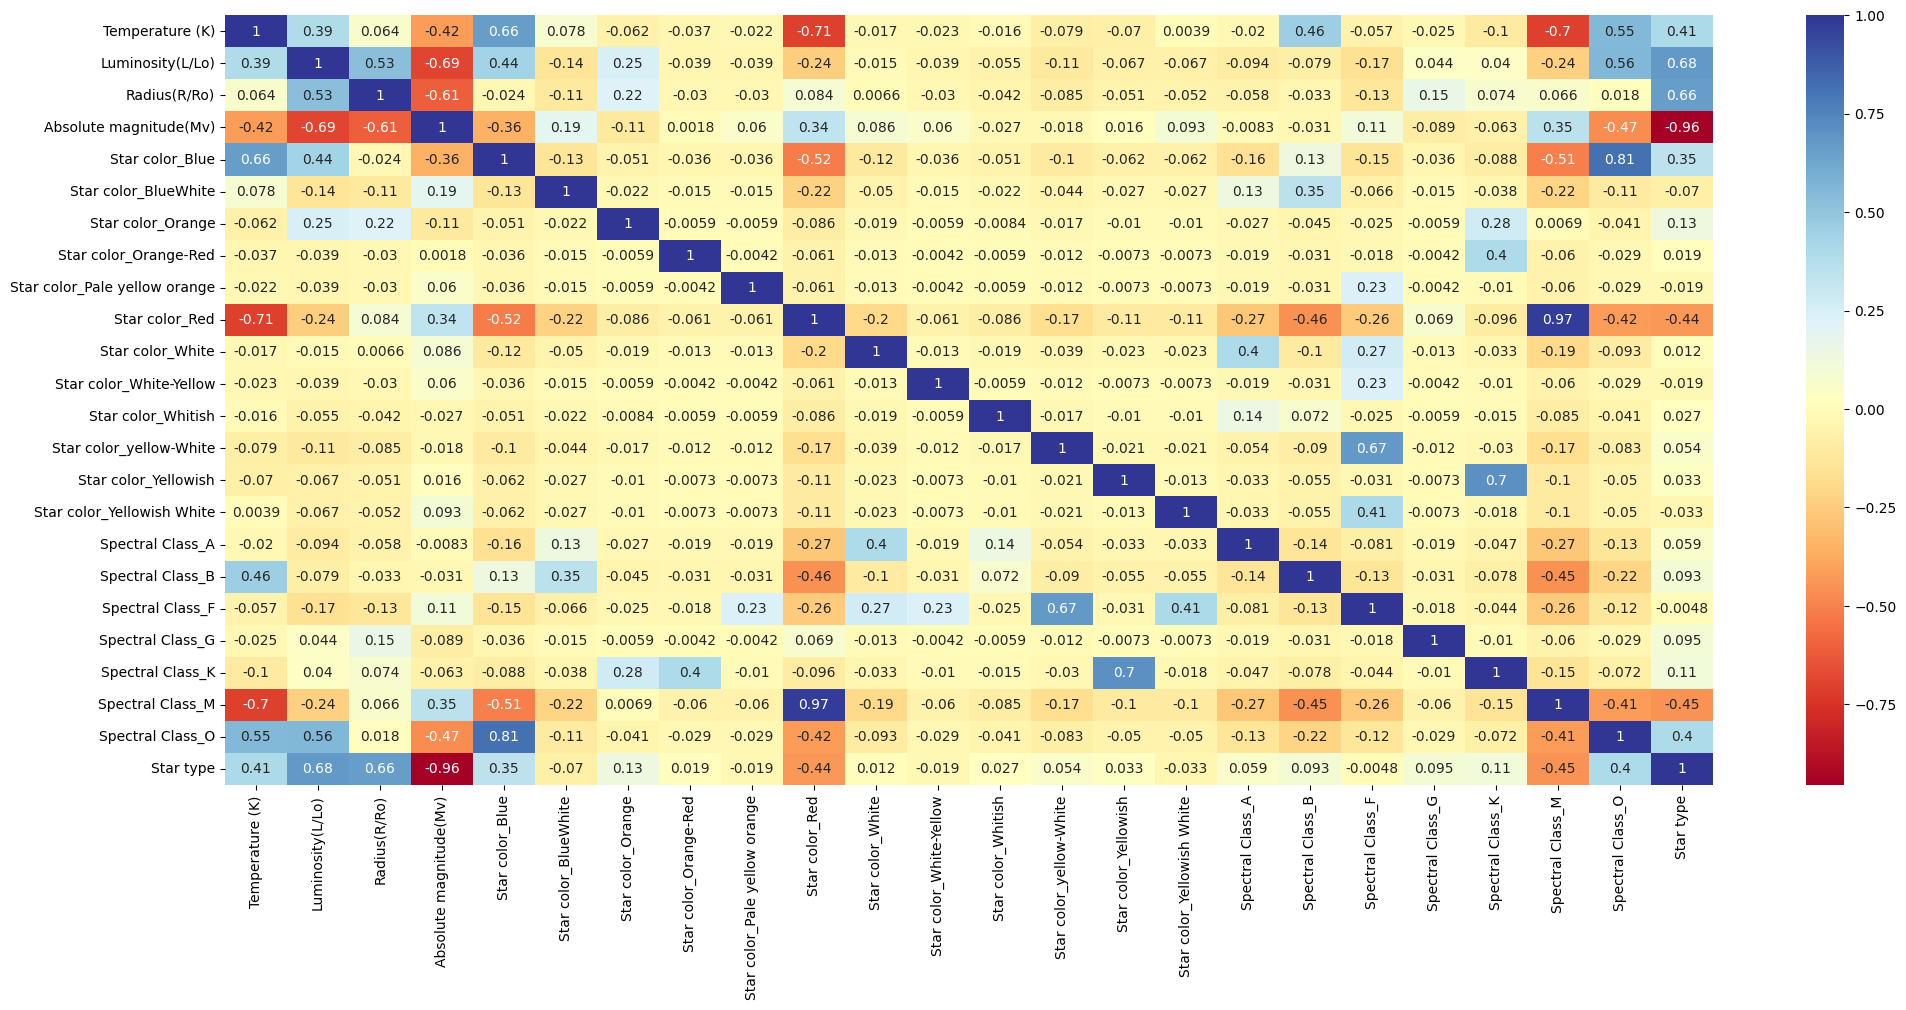

In [13]:
plt.figure(figsize=(24,10))
Correlation = df2.corr()
sns.heatmap(Correlation, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [14]:
#การสร้างตัวแปร X และ y เพื่อเตรียมข้อมูลสำหรับการสร้างและทดสอบ
X = df2.drop('Star type',axis=1)
y = df2['Star type']

In [15]:
from sklearn.model_selection import train_test_split
#เพื่อแบ่งข้อมูลออกเป็นชุดข้อมูลฝึก (training) และชุดข้อมูลทดสอบ (testing)

In [16]:
#split into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
#describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (192, 23)
Number transactions y_train dataset:  (192,)
Number transactions X_test dataset:  (48, 23)
Number transactions y_test dataset:  (48,)


In [18]:
df2.std(numeric_only=True)

Temperature (K)                    9552.425037
Luminosity(L/Lo)                 179432.244940
Radius(R/Ro)                        517.155763
Absolute magnitude(Mv)               10.532512
Star color_Blue                       0.423836
Star color_BlueWhite                  0.226819
Star color_Orange                     0.091096
Star color_Orange-Red                 0.064550
Star color_Pale yellow orange         0.064550
Star color_Red                        0.499930
Star color_White                      0.200244
Star color_White-Yellow               0.064550
Star color_Whitish                    0.091096
Star color_yellow-White               0.179881
Star color_Yellowish                  0.111335
Star color_Yellowish White            0.111335
Spectral Class_A                      0.270563
Spectral Class_B                      0.394435
Spectral Class_F                      0.257082
Spectral Class_G                      0.064550
Spectral Class_K                      0.156451
Spectral Clas

# **Data Visual**

<h1>KNN<h1>

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [20]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [21]:
X_train_sc.std(numeric_only=True)

Temperature (K)                  1.002614
Luminosity(L/Lo)                 1.002614
Radius(R/Ro)                     1.002614
Absolute magnitude(Mv)           1.002614
Star color_Blue                  1.002614
Star color_BlueWhite             1.002614
Star color_Orange                1.002614
Star color_Orange-Red            1.002614
Star color_Pale yellow orange    1.002614
Star color_Red                   1.002614
Star color_White                 1.002614
Star color_White-Yellow          1.002614
Star color_Whitish               1.002614
Star color_yellow-White          1.002614
Star color_Yellowish             1.002614
Star color_Yellowish White       1.002614
Spectral Class_A                 1.002614
Spectral Class_B                 1.002614
Spectral Class_F                 1.002614
Spectral Class_G                 0.000000
Spectral Class_K                 1.002614
Spectral Class_M                 1.002614
Spectral Class_O                 1.002614
dtype: float64

In [22]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [23]:
X_test_sc.std(numeric_only=True)

Temperature (K)                  1.001138
Luminosity(L/Lo)                 1.233208
Radius(R/Ro)                     0.799772
Absolute magnitude(Mv)           0.991035
Star color_Blue                  1.002684
Star color_BlueWhite             1.100938
Star color_Orange                0.000000
Star color_Orange-Red            0.000000
Star color_Pale yellow orange    0.000000
Star color_Red                   1.009040
Star color_White                 0.682863
Star color_White-Yellow          0.000000
Star color_Whitish               0.000000
Star color_yellow-White          1.536005
Star color_Yellowish             1.421637
Star color_Yellowish White       0.000000
Spectral Class_A                 0.710857
Spectral Class_B                 1.051502
Spectral Class_F                 1.111706
Spectral Class_G                 0.144338
Spectral Class_K                 0.906306
Spectral Class_M                 1.004620
Spectral Class_O                 1.071992
dtype: float64

In [24]:
Ks = np.arange(1,35,1)
Ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [25]:
scores = {}
scores['K'] = []
scores['accuracy'] = []
scores['precision_w'] = []
scores['recall_w'] = []
scores['f1_w'] = []
for k in Ks:
    model = knn(n_neighbors=k) # n_neighbors = value for K-neighbors
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    scores['K'].append(k)
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores['precision_w'].append(metrics.precision_score(y_test, y_pred, average='weighted'))
    scores['recall_w'].append(metrics.recall_score(y_test, y_pred, average='weighted'))
    scores['f1_w'].append(metrics.f1_score(y_test, y_pred, average='weighted'))
scores = pd.DataFrame(scores)
scores.sort_values(by='accuracy', ascending=False).head(10)

,K,accuracy,precision_w,recall_w,f1_w
0,1,0.958333,0.966667,0.958333,0.959351
2,3,0.958333,0.966667,0.958333,0.959351
3,4,0.958333,0.966667,0.958333,0.959351
1,2,0.958333,0.966667,0.958333,0.959351
4,5,0.937500,0.944213,0.937500,0.938589
10,11,0.937500,0.944213,0.937500,0.938138
11,12,0.937500,0.944213,0.937500,0.938138
12,13,0.937500,0.944213,0.937500,0.938138
13,14,0.937500,0.944213,0.937500,0.938138
16,17,0.916667,0.928872,0.916667,0.915620


In [26]:
df_forPlot = pd.melt(scores,
                     value_vars = ['accuracy', 'precision_w', 'recall_w', 'f1_w'],
                     id_vars = ['K'],
                     var_name = 'Metric',
                     value_name = 'Score')
df_forPlot.head()

,K,Metric,Score
0,1,accuracy,0.958333
1,2,accuracy,0.958333
2,3,accuracy,0.958333
3,4,accuracy,0.958333
4,5,accuracy,0.937500


In [27]:
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn(n_neighbors=3) # n_neighbors = value for K-neighbors
model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = model.predict(X_test_sc)
y_pred

array([3, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 3, 5, 2, 5, 0, 3, 3, 4, 3, 1,
       4, 1, 4, 0])

In [29]:
from sklearn import metrics  #ทำConfusion metrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 7  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  1 10  0]
 [ 0  0  0  0  0  6]]


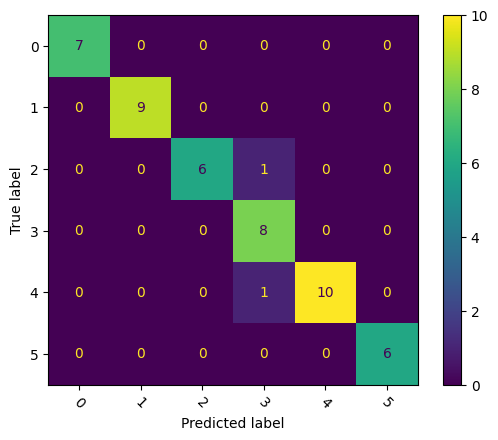

In [30]:
metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=['0','1','2','3','4','5']).plot(xticks_rotation=-45)

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      0.86      0.92         7
           3       0.80      1.00      0.89         8
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00         6

    accuracy                           0.96        48
   macro avg       0.97      0.96      0.96        48
weighted avg       0.97      0.96      0.96        48



<h1>MLP<h1>

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=5, random_state=1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
print("Average=%0.2f SD=%0.2f" % (scores.round(4).mean(),scores.round(4).std()))
model.fit(X_train, y_train)

Average=0.17 SD=0.00


MLPClassifier(hidden_layer_sizes=5, random_state=1, solver='lbfgs')

In [36]:
y_pred = model.predict(X_test)
y_pred

array([4, 1, 2, 3, 3, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 3, 5, 0, 3, 4, 5, 5,
       4, 3, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
       0, 3, 1, 2])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat1 = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))

[[ 6  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 10]]


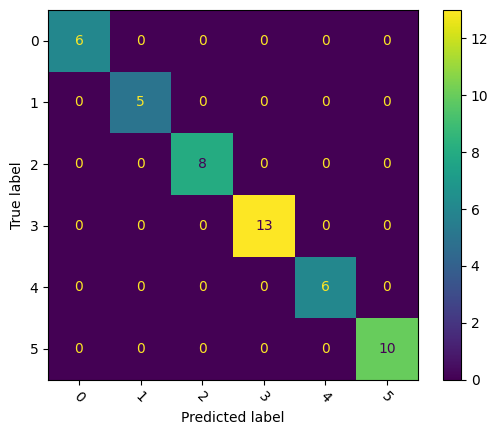

In [38]:
metrics.ConfusionMatrixDisplay(conf_mat1,
                               display_labels=['0','1','2','3','4','5']).plot(xticks_rotation=-45)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



<h1>MLP GridSearch<h1>

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=5, random_state=1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Average=%0.2f SD=%0.2f" % (scores.round(4).mean(),scores.round(4).std()))

Average=1.00 SD=0.00


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = dict(
    hidden_layer_sizes=[(16,8),(8,4)],
    activation=['logistic', 'tanh', 'relu'],
    solver=['lbfgs', 'sgd', 'adam'],
    max_iter=[10000]
)
clf = GridSearchCV(model, param_grid=param_grid, cv=10)
clf.fit(X, y)
print(clf.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (16, 8), 'max_iter': 10000, 'solver': 'adam'}


In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([2, 4, 3, 0, 1, 1, 2, 5, 2, 4, 5, 2, 2, 1, 4, 2, 2, 3, 5, 2, 5, 2,
       4, 2, 0, 1, 4, 4, 4, 5, 4, 1, 4, 3, 0, 1, 2, 4, 1, 5, 5, 3, 4, 5,
       2, 1, 0, 5])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 4  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  1  4  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  9]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        11
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         9

    accuracy                           0.98        48
   macro avg       0.99      0.97      0.97        48
weighted avg       0.98      0.98      0.98        48



In [49]:
import pickle
filename = "my_model.pickle"
pickle.dump(model, open(filename, "wb"))
loaded_model = pickle.load(open(filename, "rb"))
y_pred2 = loaded_model.predict(X_test)
conf_mat2 = metrics.confusion_matrix(y_test, y_pred2)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 4  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  1  4  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        11
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         9

    accuracy                           0.98        48
   macro avg       0.99      0.97      0.97        48
weighted avg       0.98      0.98      0.98        48



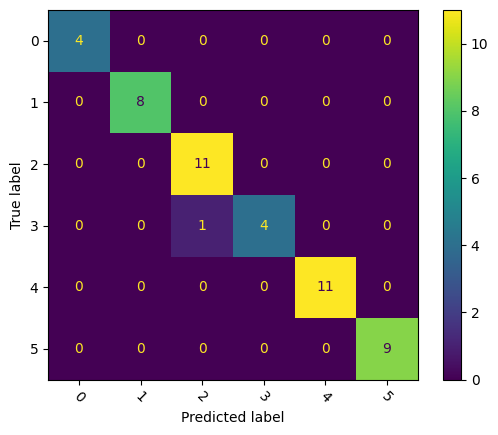

In [50]:
metrics.ConfusionMatrixDisplay(conf_mat2,
                               display_labels=['0','1','2','3','4','5']).plot(xticks_rotation=-45)

In [51]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (13 * figscale, 1 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Star type', 'Star color'], **{'inner': 'stick'})
chart

In [52]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Star type', 'Spectral Class'], **{'inner': 'stick'})
chart
